## Isocontours of Normal Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import random
from scipy.stats import multivariate_normal
import seaborn as sns

In [2]:
def multiNormalPdf(mu,Sigma,pos):
    d = mu.size
    fac = np.einsum('...k,kl,...l->...', \
                    pos-mu, np.linalg.inv(Sigma), pos-mu)
    Z = 1/(np.sqrt(2*np.pi)**d * \
           np.sqrt(np.linalg.det(Sigma))) *np.exp(-fac / 2)
    return Z


In [3]:
# (a)
def ContourPlot1(mu,Sigma,xmin,xmax,ymin,ymax):
    N = 60
    X = np.linspace(xmin, xmax, N)
    Y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(X, Y)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    
    Z = multiNormalPdf(mu,Sigma,pos)
    fig = plt.figure()
    ax = fig.gca()
    ax.set_aspect(1)
    cset = ax.contourf(X, Y, Z, cmap='coolwarm')

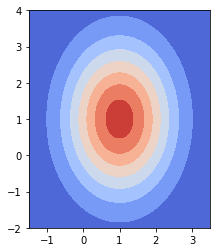

In [4]:
Sigma = np.array([[1,0], [0,2]]) 
mu = np.array([1,1])
ContourPlot1(mu,Sigma,-1.5,3.5,-2,4)

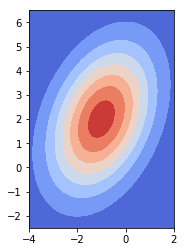

In [5]:
# (b)
Sigma = np.array([[2,1], [1,4]]) 
mu = np.array([-1,2])
ContourPlot1(mu,Sigma,-4,2,-2.5,6.5)

In [6]:
def ContourPlot2(mu_1,Sigma_1,mu_2,Sigma_2, \
                 xmin,xmax,ymin,ymax):
    N = 60
    X = np.linspace(xmin, xmax, N)
    Y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(X, Y)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    
    Z = multiNormalPdf(mu_1,Sigma_1,pos) - \
                multiNormalPdf(mu_2,Sigma_2,pos)
    fig = plt.figure()
    ax = fig.gca()
    ax.set_aspect(1)
    cset = ax.contourf(X, Y, Z, cmap='coolwarm')


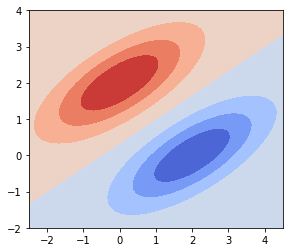

In [7]:
# (c)
Sigma = np.array([[2,1], [1,1]]) 
mu_1 = np.array([0,2])
mu_2 = np.array([2,0])
ContourPlot2(mu_1,Sigma,mu_2,Sigma,-2.5,4.5,-2,4)

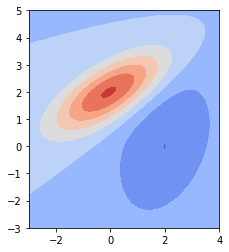

In [8]:
# (d)
Sigma_1 = np.array([[2,1], [1,1]]) 
Sigma_2 = np.array([[2,1], [1,4]]) 
mu_1 = np.array([0,2])
mu_2 = np.array([2,0])
ContourPlot2(mu_1,Sigma_1,mu_2,Sigma_2,-3,4,-3,5)

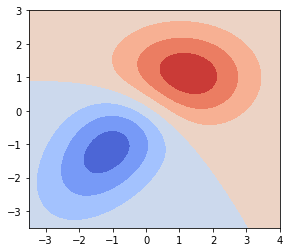

In [9]:
# (e)
Sigma_1 = np.array([[2,0], [0,1]]) 
Sigma_2 = np.array([[2,1], [1,2]]) 
mu_1 = np.array([1,1])
mu_2 = np.array([-1,-1])
ContourPlot2(mu_1,Sigma_1,mu_2,Sigma_2,-3.5,4,-3.5,3)

## Eigenvectors of the Gaussian Covariance Matrix


In [10]:
np.random.seed(10130)
x_1 = np.random.normal(3,3,size=100)
np.random.seed(189)
x_2 = x_1 / 2 + np.random.normal(4,2,size=100)

In [11]:
# (a)
mean = tuple([np.mean(x_1),np.mean(x_2)])
print("The mean of sample is",mean)

The mean of sample is (3.320627223330448, 5.394127429864527)


In [12]:
# (b)
X = np.stack((x_1,x_2),axis=0)
Sigma = np.cov(X)
print("The covariance matrix of the sample is \n",Sigma)

The covariance matrix of the sample is 
 [[7.85220172 5.08973215]
 [5.08973215 7.61491086]]


In [13]:
# (c)
eigenVal, eigenVec = np.linalg.eig(Sigma)
idx = np.argsort(eigenVal)[::-1]
eigenVec = eigenVec[:,idx]
eigenVal = eigenVal[idx]
eigenVal

array([12.82467112,  2.64244147])

In [14]:
eigenVec

array([[ 0.71529868, -0.69881886],
       [ 0.69881886,  0.71529868]])

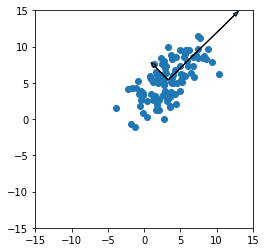

In [15]:
# (d)
plt.scatter(x_1,x_2)
ax = plt.gca()
ax.set_aspect(1)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.arrow(mean[0],mean[1],eigenVec[0][0]*eigenVal[0], \
          eigenVec[1][0]*eigenVal[0],head_width=0.5)
plt.arrow(mean[0],mean[1],eigenVec[0][1]*eigenVal[1], \
          eigenVec[1][1]*eigenVal[1],head_width=0.5)

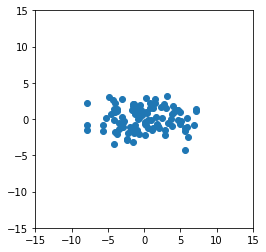

In [16]:
# (e)
ax = plt.gca()
ax.set_aspect(1)
X[0] = X[0] - mean[0]
X[1] = X[1] - mean[1]
X_rote = np.matmul(eigenVec.T,X)
plt.scatter(X_rote[0],X_rote[1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()


## Gaussian Classifiers for Digits and Spam

In [17]:
def processData(name,testing_size):
    folder = name + "-data"
    file = name + "_data"
    path = 'hw3-resources/' + folder + "/" + file + ".mat" 
    data = scipy.io.loadmat(path)

    data_X = data["training_data"]
    data_X = data_X.astype(np.float64)
    data_y = data["training_labels"]
    data_t = data["test_data"]
    
    random.seed(189)
    index = random.sample(range(data_X.shape[0]), \
                          data_X.shape[0]-testing_size)

    data_X_train = data_X[index]
    data_X_validate = np.delete(data_X, index, axis=0)
    data_y_train = data_y[index]
    data_y_validate = np.delete(data_y, index, axis=0)

    Data = dict()
    Data["X_train"] = data_X_train
    Data["X_validate"] = data_X_validate
    Data["y_train"] = data_y_train
    Data["y_validate"] = data_y_validate
    Data["test"] = data_t
    
    if name == "mnist":
        Data["X_train"] = Data["X_train"]/255
        Data["X_validate"] = Data["X_validate"]/255
        Data["test"] = Data["test"]/255
    return Data

In [18]:
mnistData = processData("mnist",0)
spamData = processData("spam",0)

In [19]:
Mu = []
Index = []
Sigma = []
for i in range(10):
    index = np.where(mnistData["y_train"] == i)[0]
    mu = np.mean(mnistData["X_train"][index], axis=0)
    sigma = np.cov(mnistData["X_train"][index],rowvar=False, bias=True)
    
    Index.append(index)
    Mu.append(mu)
    Sigma.append(sigma)
prior = [index.size/60000 for index in Index]
SigmaLDA = sum(Sigma)/10.0

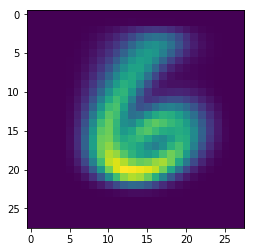

In [20]:
plt.imshow(Mu[6].reshape(28,28))

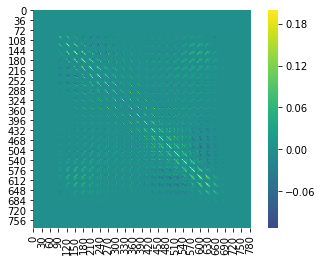

In [21]:
# (b)
sns.heatmap(Sigma[2],square=True,center=0,cmap="viridis")

In [32]:
# (c)
mnistData = processData("mnist",10000)
def trainSplit(data,size):
    shuffle = np.random.permutation(data["X_train"].shape[0])
    data_x = data["X_train"][shuffle]
    data_y = data["y_train"][shuffle]
    train_X = data_x[:size,:]
    train_y = data_y[:size,:]
    return train_X, train_y

def predictLDA(samples, priors, means, covar):
    multiGaussians = \
    [multivariate_normal(mean, covar, allow_singular=True) \
     for mean in means]
    pdfs = np.array([gauss.logpdf(samples) for gauss in multiGaussians]).T
    posteriors = pdfs + np.log(priors)
    predictions = posteriors.argmax(axis=1)
    return predictions

def predictQDA(samples, priors, means, covars):
    multiGaussians = \
    [multivariate_normal(means[i], covars[i], allow_singular=True) \
     for i in range(len(means))]
    pdfs = np.array([gauss.logpdf(samples) for gauss in multiGaussians]).T
    posteriors = pdfs + np.log(priors)
    predictions = posteriors.argmax(axis=1)
    return predictions

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test,dataname):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv(dataname+'submission.csv', index_label='Id')
    
def fitLDA(train_X,train_y,test,data="mnist"):
    Mu = []
    Index = []
    Sigma = []
    
    if data=="mnist":
        c = 10
    else:
        c = 2
        
    for i in range(c): #0-9 digits
        index = np.where(train_y == i)[0]
        mu = np.mean(train_X[index], axis=0)
        sigma = np.cov(train_X[index],rowvar=False, bias=True)
        
        Index.append(index)
        Mu.append(mu)
        Sigma.append(sigma)

    prior = [index.size/sample for index in Index]

    SigmaLDA = sum(Sigma)/10.0
    
    pred = predictLDA(test,prior, Mu, SigmaLDA)
    return pred

def fitQDA(train_X,train_y,test,data="mnist"):
    Mu = []
    Index = []
    Sigma = []
    
    if data=="mnist":
        c = 10
    else:
        c = 2
        
    for i in range(c): #0-9 digits
        index = np.where(train_y == i)[0]
        mu = np.mean(train_X[index], axis=0)
        sigma = np.cov(train_X[index],rowvar=False, bias=True)

        Index.append(index)
        Mu.append(mu)
        Sigma.append(sigma)


    prior = [index.size/sample for index in Index]

    pred = predictQDA(test,prior, Mu, Sigma)
    return pred

In [33]:
errorLDA = []
training_sample = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for sample in training_sample:
    train_X, train_y = trainSplit(mnistData,sample)

    pred = fitLDA(train_X,train_y,mnistData["X_validate"]) \
            .reshape(*mnistData["y_validate"].shape)
    accuracy = sum(pred==mnistData["y_validate"])[0]/pred.size
    print(sample, ": ",1-accuracy)
    errorLDA.append(1-accuracy)


100 :  0.3275
200 :  0.3094
500 :  0.6796
1000 :  0.3517
2000 :  0.22119999999999995
5000 :  0.1603
10000 :  0.14629999999999999
30000 :  0.13280000000000003
50000 :  0.1311


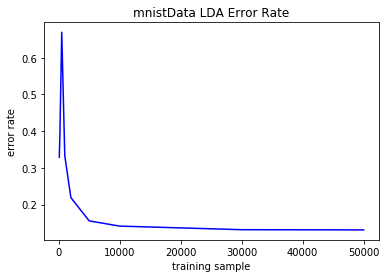

In [24]:
plt.plot(training_sample,errorLDA,c="blue")

# plt.legend(loc="lower right")
plt.xlabel("training sample")
plt.ylabel("error rate")
plt.title("mnistData LDA Error Rate")

plt.show()

In [25]:
errorQDA = []
training_sample = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for sample in training_sample:
    train_X, train_y = trainSplit(mnistData,sample)
    
    pred = fitQDA(train_X,train_y,mnistData["X_validate"]) \
            .reshape(*mnistData["y_validate"].shape)
    accuracy = sum(pred==mnistData["y_validate"])[0]/pred.size
    print(sample, ": ",1-accuracy)
    errorQDA.append(1-accuracy)


100 :  0.9082
200 :  0.8173
500 :  0.4324
1000 :  0.20309999999999995
2000 :  0.29059999999999997
5000 :  0.32420000000000004
10000 :  0.19399999999999995
30000 :  0.13739999999999997
50000 :  0.12890000000000001


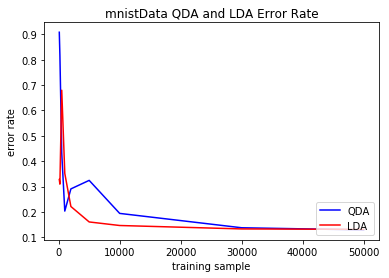

In [66]:
plt.plot(training_sample,errorQDA,c="blue",label="QDA")
plt.plot(training_sample,errorLDA,c="red",label="LDA")
plt.legend(loc="lower right")
plt.xlabel("training sample")
plt.ylabel("error rate")
plt.title("mnistData QDA and LDA Error Rate")

plt.show()

In [61]:
train_X, train_y = trainSplit(mnistData,50000)
predLDA = fitLDA(train_X,train_y,mnistData["X_validate"])
errLDA = []
predQDA = fitQDA(train_X,train_y,mnistData["X_validate"])
errQDA = []
for i in range(10):
    index = np.where(mnistData["y_validate"] == i)[0]
    predLDA_index = predLDA[index] \
                    .reshape(*mnistData["y_validate"][index].shape)
    predQDA_index = predQDA[index] \
                    .reshape(*mnistData["y_validate"][index].shape)
    result = mnistData["y_validate"][index]
    
    errLDA.append(1-sum(predLDA_index==result)[0]/len(predLDA_index))
    errQDA.append(1-sum(predQDA_index==result)[0]/len(predQDA_index))

Text(0.5, 1.0, 'validation error for each digit class')

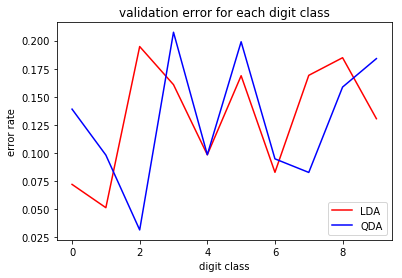

In [65]:
plt.plot(errLDA,c="red",label="LDA")
plt.plot(errQDA,c="blue",label="QDA")
plt.legend(loc="lower right")
plt.xlabel("digit class")
plt.ylabel("error rate")
plt.title("validation error for each digit class")

In [27]:
mnistData = processData("mnist",0)
train_X, train_y = trainSplit(mnistData,60000)


pred = fitLDA(train_X,train_y,mnistData["test"])
results_to_csv(pred,"mnistLDA")

pred = fitQDA(train_X,train_y,mnistData["test"])
results_to_csv(pred,"mnistQDA")

In [28]:
spamData = processData("spam",0)
train_X, train_y = trainSplit(spamData,5172)
pred = fitLDA(train_X,train_y,spamData["test"],data="spam")
results_to_csv(pred,"spamLDA")
pred = fitQDA(train_X,train_y,spamData["test"],data="spam")
results_to_csv(pred,"spamQDA")